In [1]:
import sys
sys.path.append('/sf/cristallina/applications/slic/cristallina/crq_exp/')
from diffractometer import Diffractometer
from slic.core.adjustable import PVAdjustable,Adjustable
dm1 = Diffractometer("SARES31-GPS")
dm2 = Diffractometer("SARES32-GPS")
from time import sleep
import h5py
import matplotlib.pyplot as plt
from bsread import source, PULL
from slic.core.acquisition import PVAcquisition
from slic.core.adjustable import Collection
from slic.core.acquisition.pvacquisition import epics_to_h5_polling
from sfdata import SFDataFile
from collections import defaultdict
import numpy as np
from tqdm.notebook import tqdm
from slic.devices.general.motor import Motor

]0;⊚slic

In [2]:
dm1_chs = ['SARES31-GPS:ROT2THETA-BS',
'SARES31-GPS:ROTTHETA-BS',
'SARES31-GPS:ROTX-BS',
'SARES31-GPS:ROTZ-BS',
'SARES31-GPS:TD-BS',
'SARES31-GPS:TRX-BS',
'SARES31-GPS:TRXBASE-BS',
'SARES31-GPS:TRY-BS',
'SARES31-GPS:TRYBASE-Avg-BS',
'SARES31-GPS:TRYBASE-BS',
'SARES31-GPS:TRZ-BS',
          ]
dm1_axis_names = ['SARES31-GPS:ROT2THETA',
'SARES31-GPS:ROTTHETA',
'SARES31-GPS:ROTX',
'SARES31-GPS:ROTZ',
'SARES31-GPS:TD',
'SARES31-GPS:TRX',
'SARES31-GPS:TRXBASE',
'SARES31-GPS:TRY',
'SARES31-GPS:TRYBASE-Avg',
'SARES31-GPS:TRYBASE',
'SARES31-GPS:TRZ',
          ]


In [3]:
def get_pid_adjustables(axis):
    adj_p = PVAdjustable(axis.ID+'-Ctrl-Kp')
    adj_i = PVAdjustable(axis.ID+'-Ctrl-Ki')
    adj_d = PVAdjustable(axis.ID+'-Ctrl-Kd')
    return [adj_p,adj_i,adj_d]

def get_pids(axis):
    pid_adjs = get_pid_adjustables(axis)
    vals = []
    for pid_adj in pid_adjs:
        vals.append(pid_adj.get())
    return vals

def set_pids(axis,pid_list,check_if_done=True):
    pid_adjs = get_pid_adjustables(axis)
    for i,pid_val in enumerate(pid_list):
        pid_adjs[i].set(pid_val)
    if check_if_done:
        while pid_list != get_pids(axis):
            sleep(0.1)

def set_axis_enable_status(axis_list_or_name,enable_value):
    
    if type(axis_list_or_name) == str:
        PVAdjustable(axis_list_or_name+'-EnaCmd').set_target_value(enable_value)
    if type(axis_list_or_name) == list:
        for axis in axis_list_or_name:
            PVAdjustable(axis+'-EnaCmd').set_target_value(enable_value)  

In [30]:
def record_channels(channel_list, second_interval = 1, dispatcher_url = 'http://localhost:8080'): 
    data = defaultdict()
    with source(channels=channel_list, dispatcher_url=dispatcher_url, mode=PULL) as stream:
        for channel in channel_list:
                data[channel] = []
        for i in tqdm(range(int(second_interval*100))):
            message = stream.receive()
            for channel in channel_list:
                data[channel].append(message.data.data[channel].value)
    return data

def plot_all_channels(d,remove_from_titles = 'SARES31-GPS:'):
    n_channels = len(d.keys())
    fig_dim = int(np.sqrt(n_channels))
    
    fig,ax = plt.subplots( fig_dim, fig_dim+1, figsize = (4*fig_dim,4*fig_dim),constrained_layout=True )
    ax =ax.flatten()
    for i,channel in enumerate(d.keys()):
        ax[i].plot(d[channel],label=channel)
        if remove_from_titles:
            title = str(channel).replace(remove_from_titles,"")
        else:
            title = str(channel)
        ax[i].set_title(title)
    # plt.legend()
    # plt.tight_layout()

def plot_channel(d,channel,remove_from_titles = 'SARES31-GPS:'):
    fig,ax = plt.subplots( 1,1, figsize = (6,6),constrained_layout=True )
    ax.plot(d[channel],label=channel)
    if remove_from_titles:
        title = str(channel).replace(remove_from_titles,"")
    else:
        title = str(channel)
    ax.set_title(title)
    # plt.legend()
    # plt.tight_layout()


In [26]:

set_axis_enable_status(dm1_axis_names,False)

#set_axis_enable_status(dm1.tr_x.ID,True)

In [19]:
dm1.twotheta.deadband_ecmc.set_target_value(1e-6)

Task: running

In [10]:
dm1.theta.set_target_value(0.01)

Task: running

In [25]:
dm1.td.deadband_ecmc.set_target_value(0)

Task: running

In [43]:
# dm1.twotheta.set_target_value(0)
d = record_channels(dm1_chs,second_interval=20)

  0%|          | 0/2000 [00:00<?, ?it/s]

[WARNING] bsread.data.helpers - 'type' channel field not found. Parse as 64-bit floating-point number float64 (default).
[WARNING] bsread.data.helpers - 'type' channel field not found. Parse as 64-bit floating-point number float64 (default).
[WARNING] bsread.data.helpers - 'type' channel field not found. Parse as 64-bit floating-point number float64 (default).
[WARNING] bsread.data.helpers - 'type' channel field not found. Parse as 64-bit floating-point number float64 (default).
[WARNING] bsread.data.helpers - 'type' channel field not found. Parse as 64-bit floating-point number float64 (default).
[WARNING] bsread.data.helpers - 'type' channel field not found. Parse as 64-bit floating-point number float64 (default).
[WARNING] bsread.data.helpers - 'type' channel field not found. Parse as 64-bit floating-point number float64 (default).
[WARNING] bsread.data.helpers - 'type' channel field not found. Parse as 64-bit floating-point number float64 (default).
[WARNING] bsread.data.helpers - 

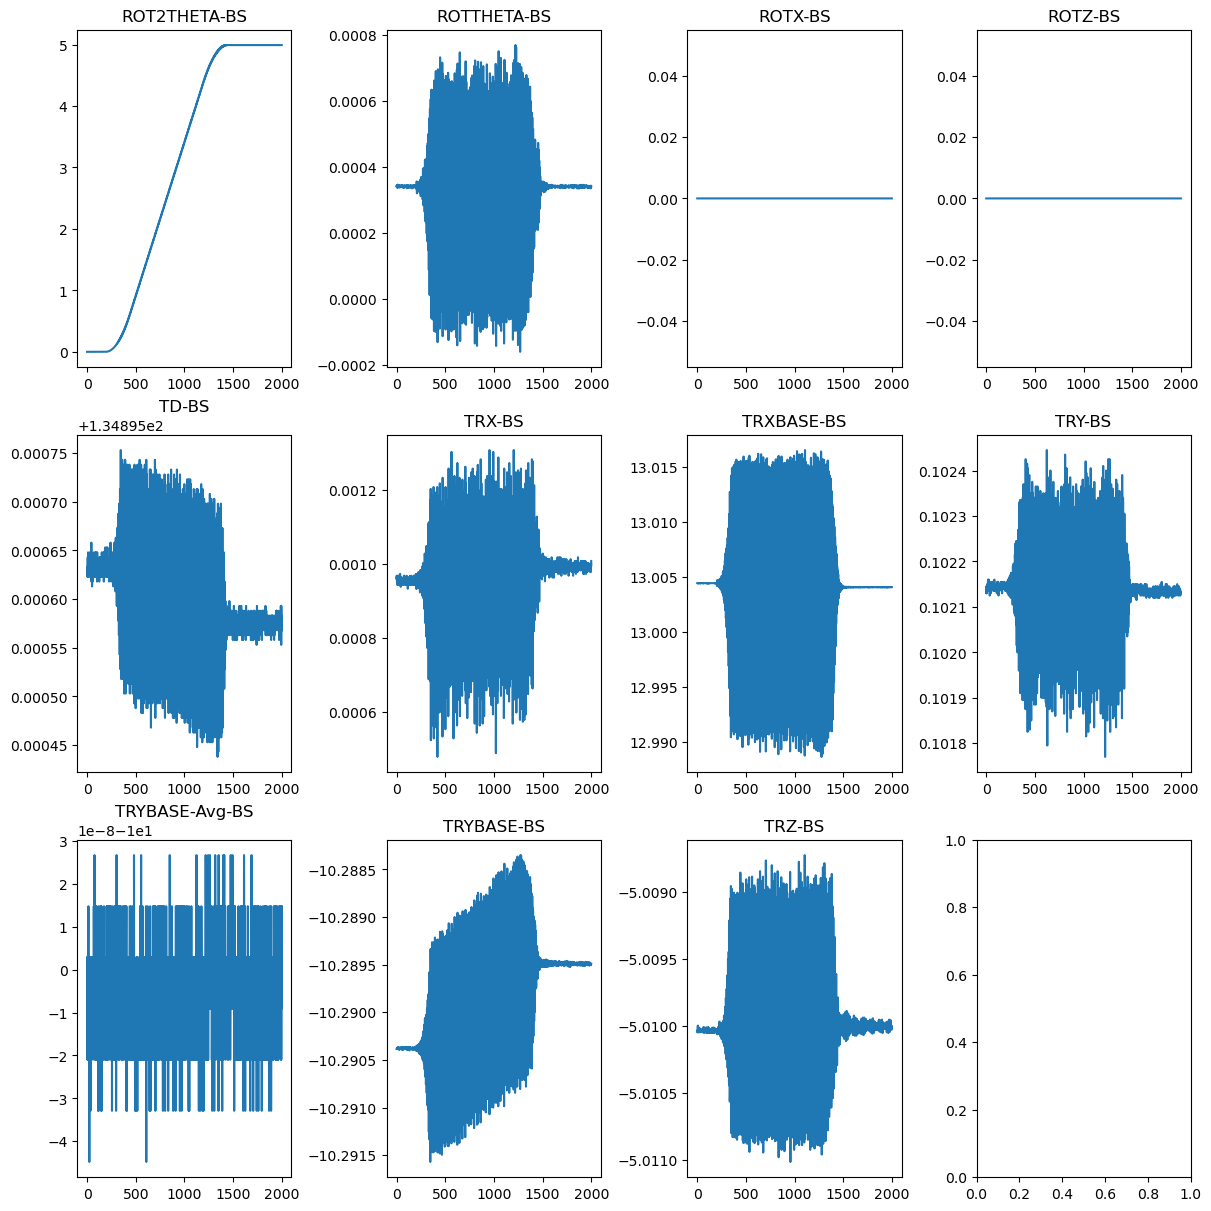

In [33]:
plot_all_channels(d,remove_from_titles='SARES31-GPS:')

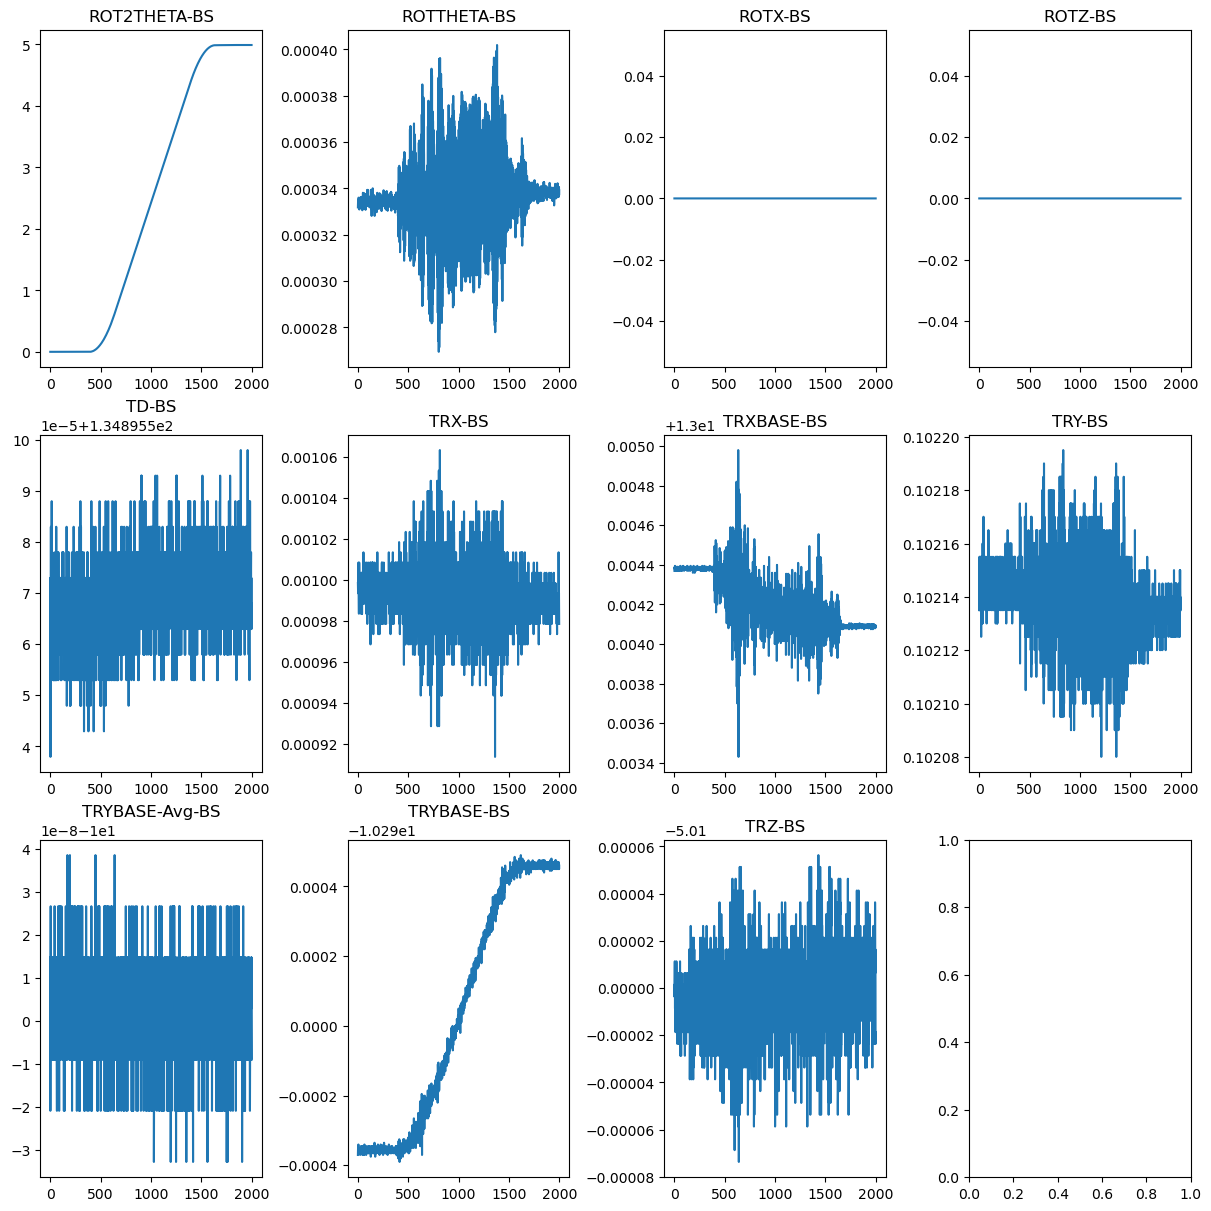

In [37]:
plot_all_channels(d,remove_from_titles='SARES31-GPS:')

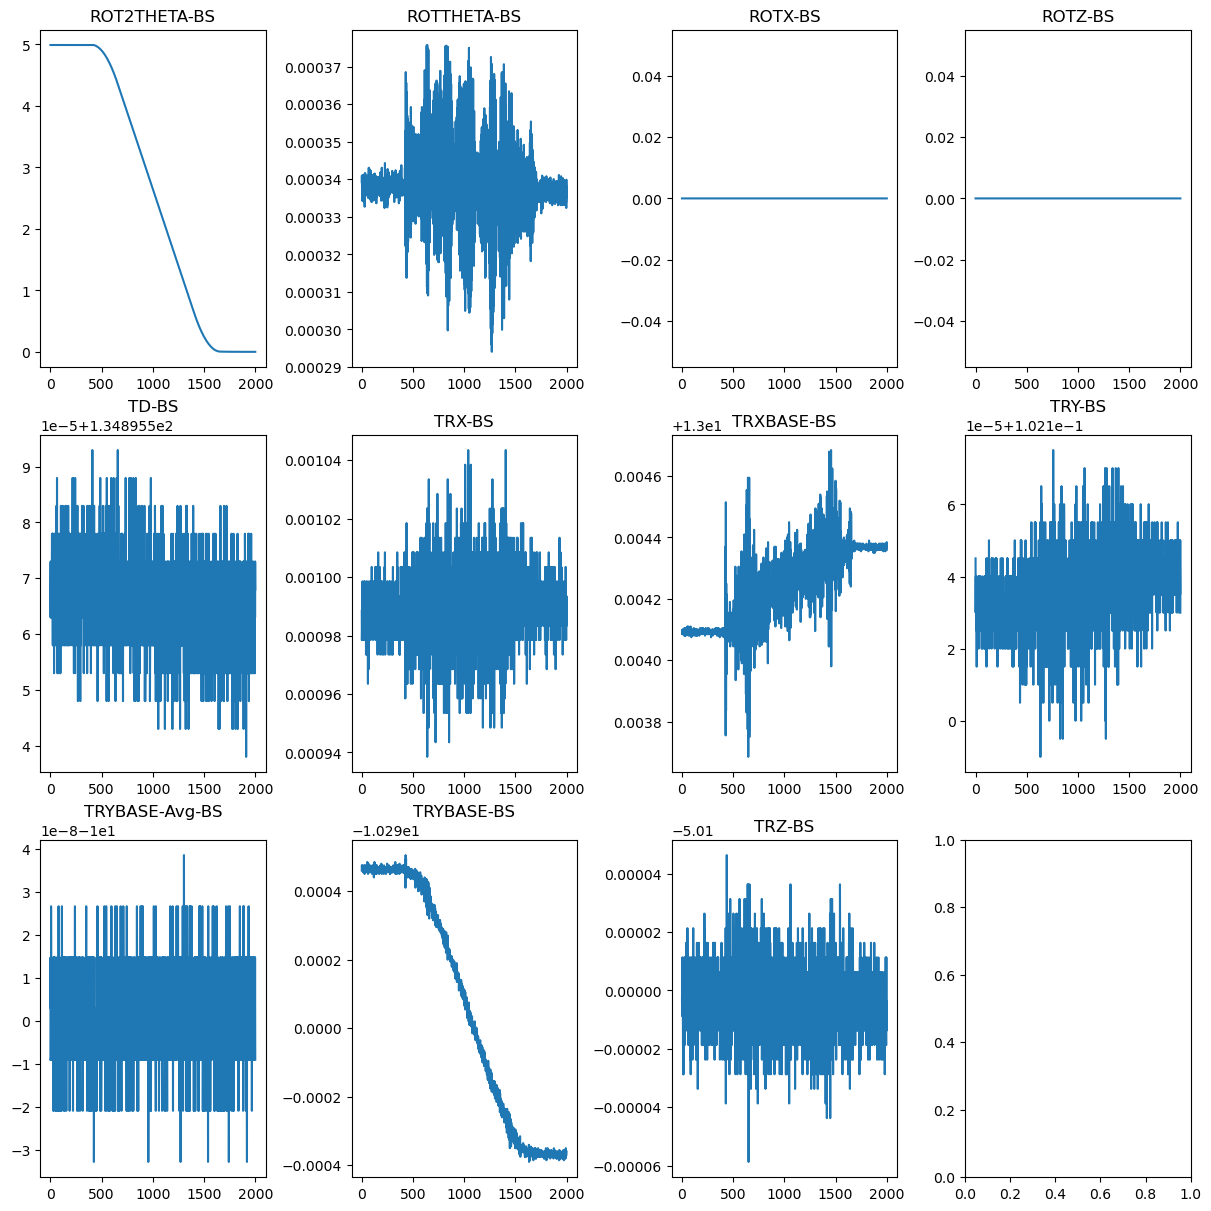

In [39]:
plot_all_channels(d,remove_from_titles='SARES31-GPS:')

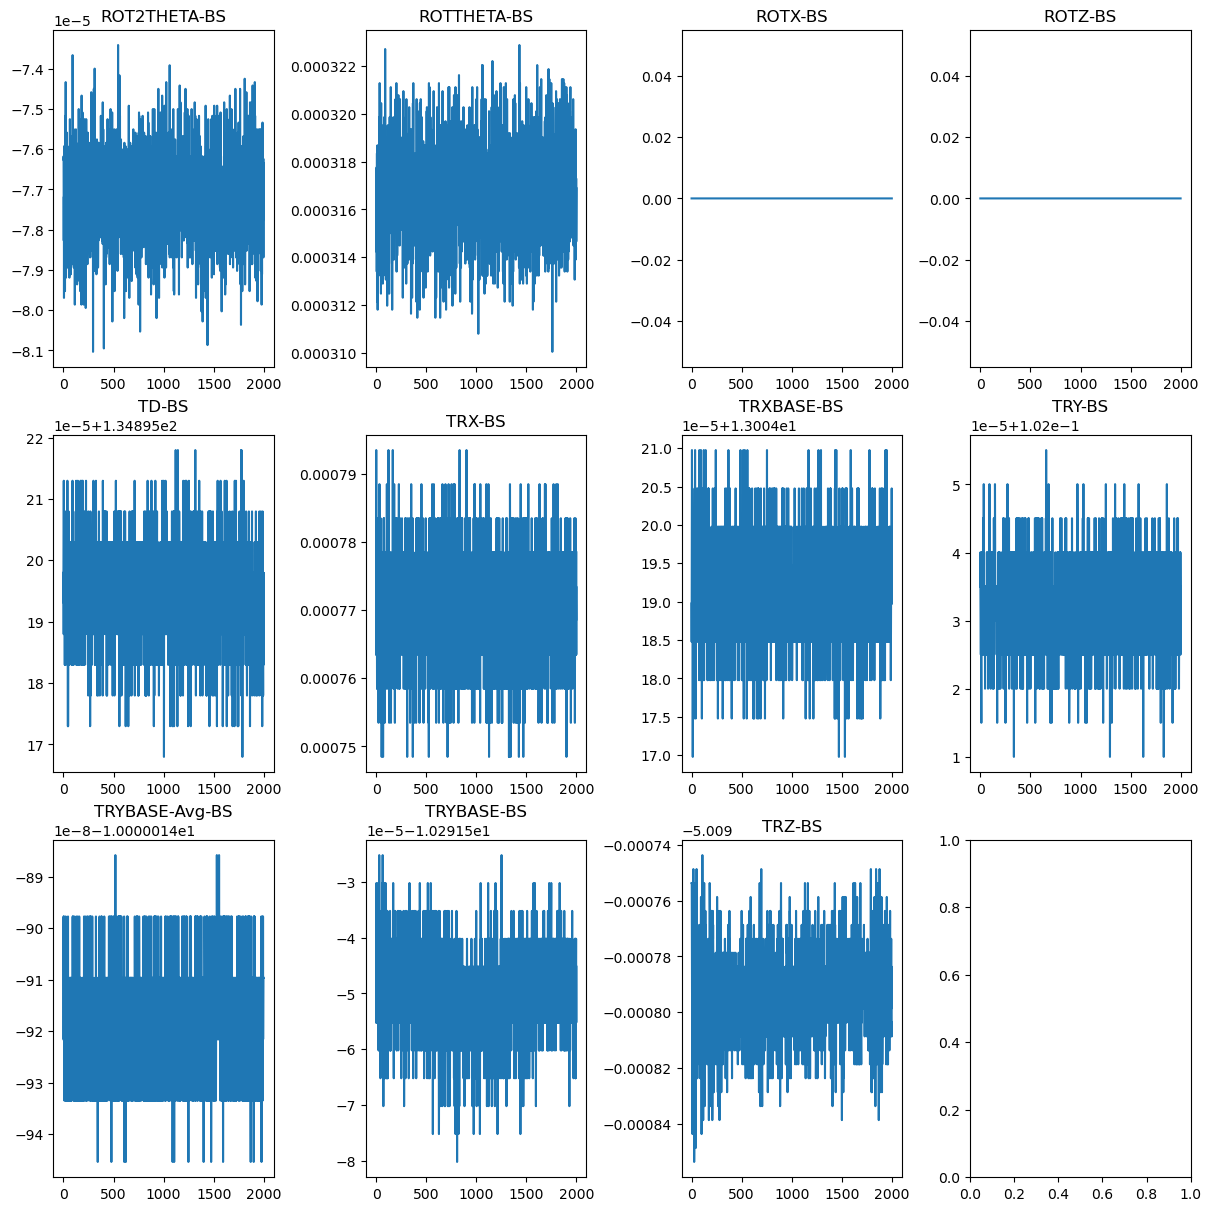

In [44]:
plot_all_channels(d,remove_from_titles='SARES31-GPS:')

/sf/cristallina/applications/conda/envs/slic/lib/python3.9/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


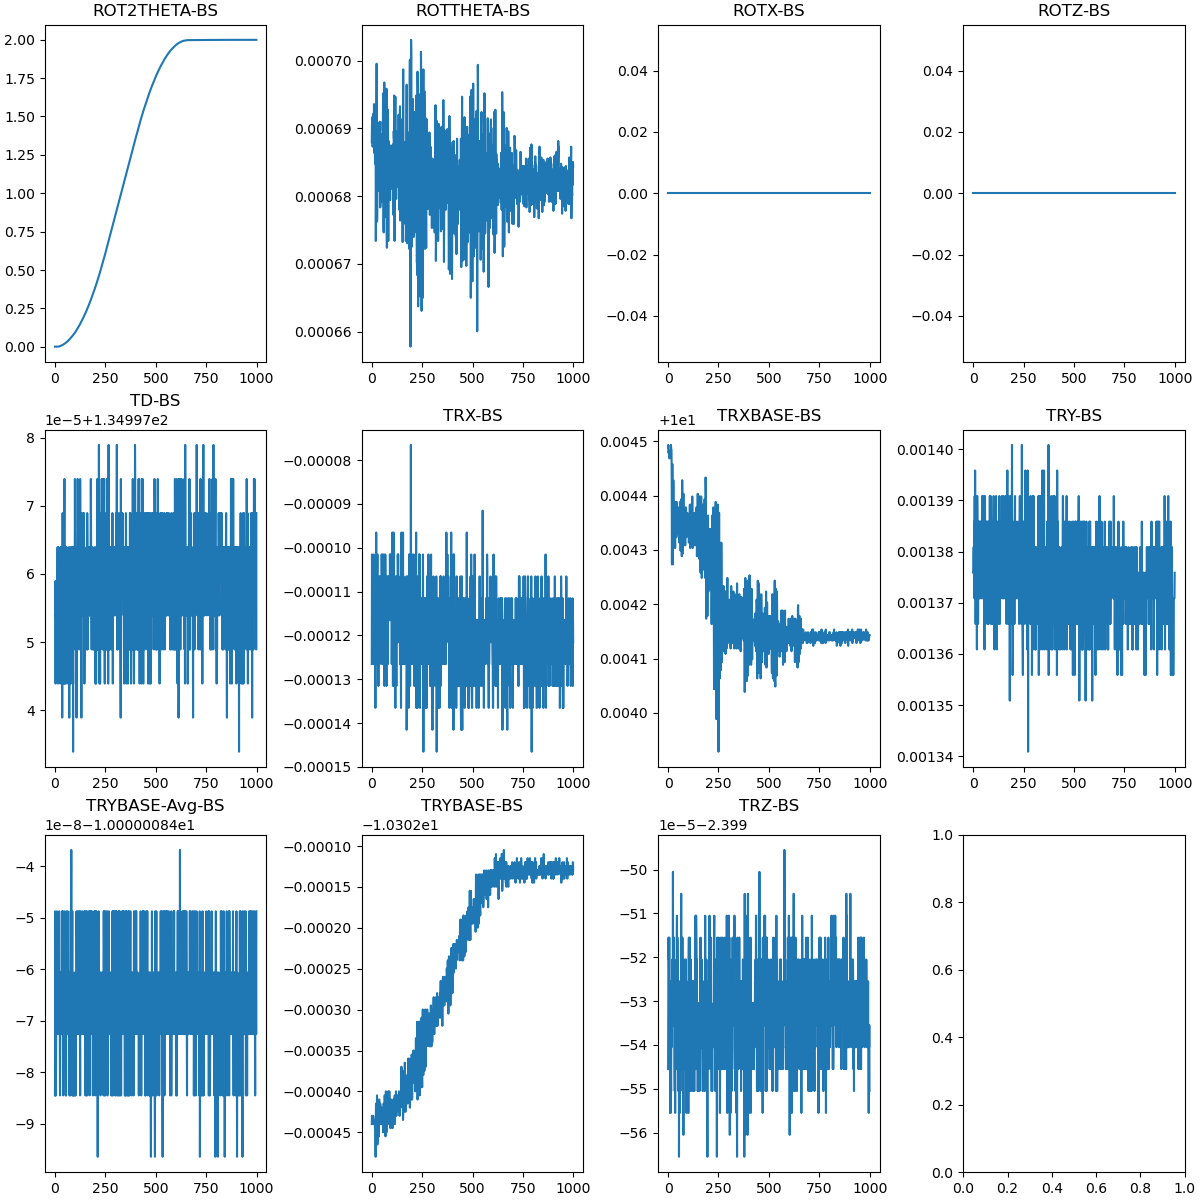

In [249]:
plot_all_channels(d,remove_from_titles='SARES31-GPS:')

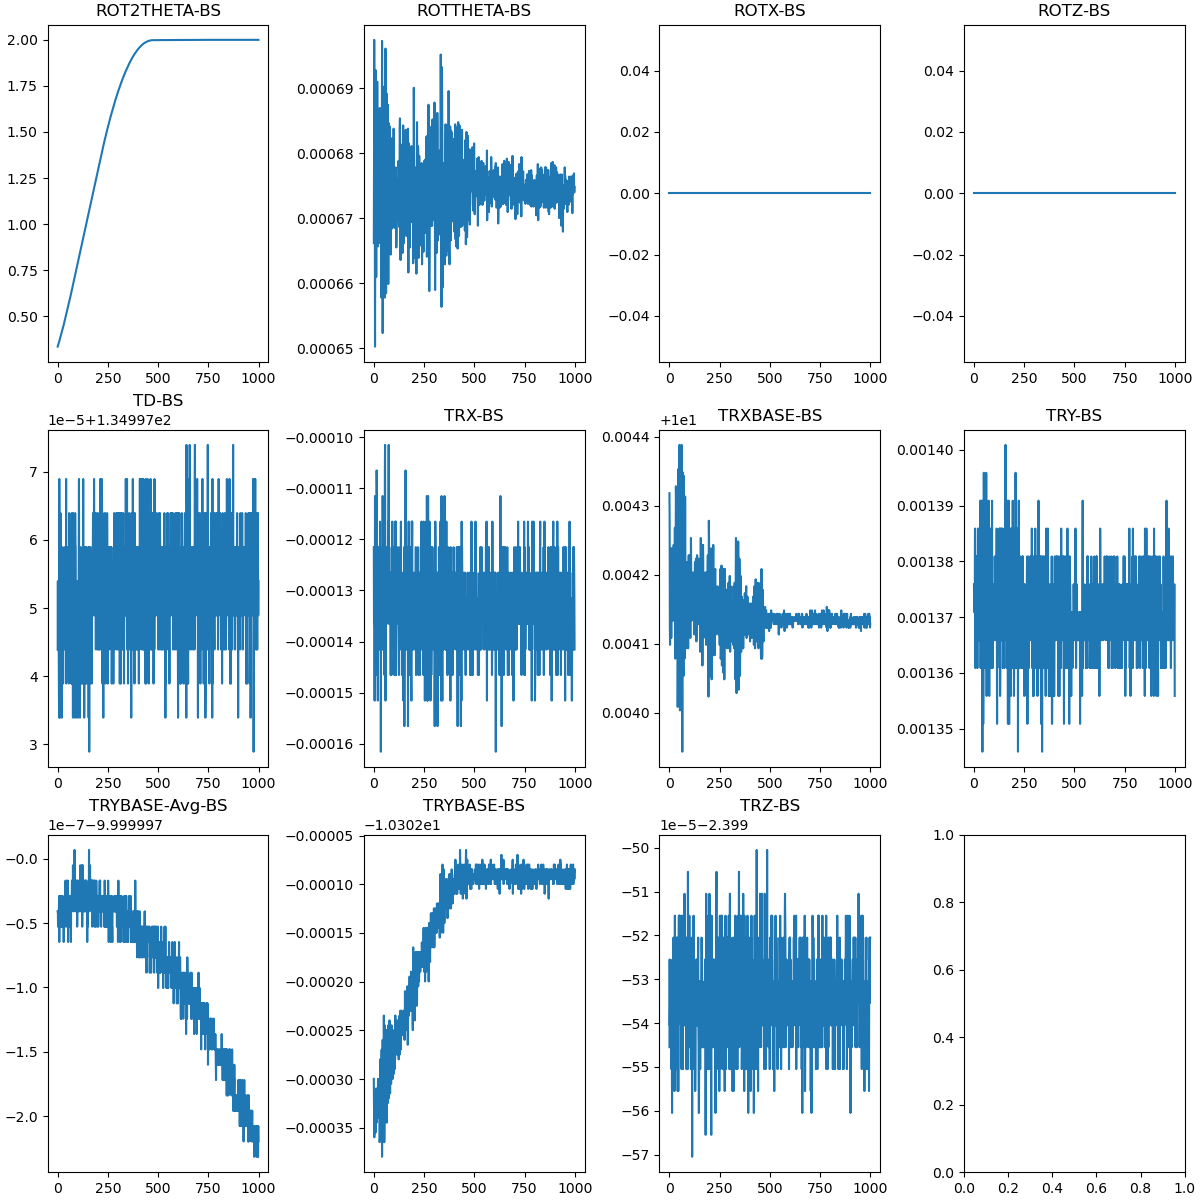

In [256]:
plot_all_channels(d,remove_from_titles='SARES31-GPS:')

# Notes
## TRXYZ sample stages
There is about ~0.25um random offset error of the position, which is constintent with a deadband of about 0.5um. The system generally overshoots in the direction of travel by this amount.
### TRX
P=10 is about maximum that does not oscillate, adding I does not seem to improve the final approach to the right value, already 0.1 destabilises the system (0.01 is the max tolerable, but one does not gain much with it)
### TRY
P=10 works quite well, no need for other terms
### TRZ
P=10 is a bit much as it overshoots by a few um. Adding D does not seem to help. P=7 seems to be about the best overshoot/undersoot tradeoff.

## Thetas
### ROTTHETA
P=10 works. Values above P=20 start to shake the other axes when starting and stopping the motion. Thus, P=10 seems reasonable. The deadband in EPICS is 1mdeg. In ECMC it seems to be about 1mdeg (or a little less) as well. I does not seem to do much. For P=10, the shaking does not come from start/stop, so adding D does not help. 

### ROTTWOTHETA
Same as above.  P=20 disturbs theta encoder. Adding D does make it slower, but maybe a bit less stable

## Other
### TRXBASE
Large movements shake the top axes a bit already, so it just shouldn't shame more on the start-stop of the motion. P=10 works.

### TRYBASE
Currently P=10 with small I=0.001. The motor is very slow, so this can also be set very conservatively. It's quite important to keep these four motors disabled, because they can fight with other stages above and cause oscillations.

### TD
P=10 is fine. This motor is already extremely slow, so as long as it's stable it's fine.





In [24]:
# Notes after decreasing 